In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
data = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")

pd.options.display.max_rows = 10

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='Age'>

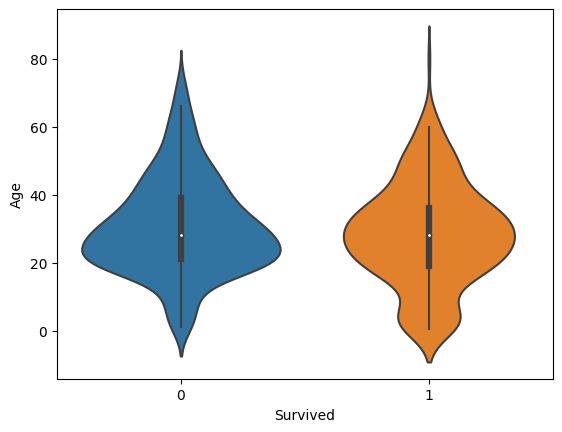

In [124]:
sns.violinplot(x="Survived", y="Age", data=data)
#Vi kan se att de yngre än ca 20 och äldrä än ca 35-40 har en ojämd "survivalrate"
#Detta får mig att tro att yngre överlevde bättre för att "women and children first" 
#samt tror jag att de äldre ca 35+ fick överleva för att de kan ha varit av högra status 
#då de hat kunnat accumelera mer tillgångar under sin livstid och är därför av högre status
#än någon okänd och 20 åring och därför fick de "viktigare" personerna gå före
#Av detta drar jag slutsatsen att "age" har en tillräklig påverkan för att inkluderas i mina algorithmer

<Axes: xlabel='Survived', ylabel='SibSp'>

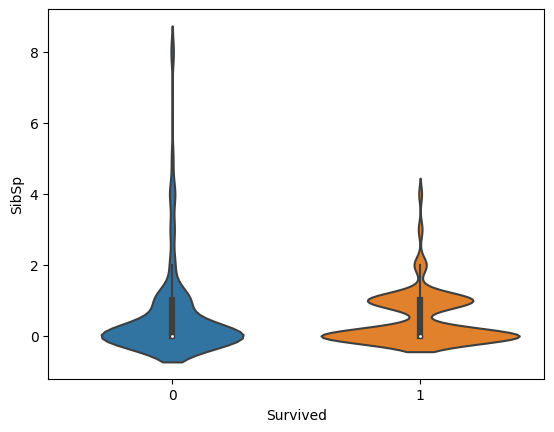

In [125]:
sns.violinplot(x="Survived", y="SibSp", data=data)
#Här ser vi antalet syskon och parterns relation till "Survivalrate" 
#Att vara färre värkar ge en högre "Survivalrate" då ingen över fem syskon överlevde
#Då de verkar vara en relativ simple ekvation där fler "SibSp" leder till minskad "Survivalrate" 
#Så finns det en avvikelse för 1 "SibSp" Jag tror det beror på att männen offrade sig för 
#att kvinnor och barn skulle prioriteras "Women and children first"
#Av detta drar jag slutsatsen att "SibSp" har en tillräklig påverkan för att inkluderas i mina algorithmer
#Jag tror även att "sex" kommer att ha en stor påverkan om min teori är korrekt

<Axes: xlabel='Survived', ylabel='Sex'>

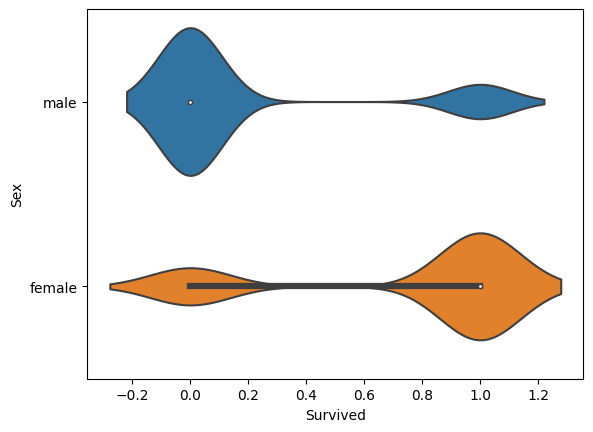

In [126]:
sns.violinplot(x="Survived", y="Sex", data=data)
#Vi kan se att kvinnor har en högre "survivalrate" än män, tillräkligt för att se att "sex"
#är en betydelse full parameter. Men jag vill veta mer

In [127]:
#Vi vill ha "survivalrate" för både män och kvinnor så att vi kan tydligare jämföra
survival_and_death_rate = data['Survived'].value_counts(normalize=True)
death_rate = survival_and_death_rate[0]
survival_rate = survival_and_death_rate[1]
survival_percentage = round(survival_rate, 5)*100
print(f"Survival rate: {survival_percentage}%")

Survival rate: 38.384%


In [128]:
#Nu har vi "survivalrate" av alla på Titanic men jag vill veta män och kvinnors "survivalrate"
all_sex_survival_rate = data.groupby(['Sex'])['Survived'].value_counts(normalize=True)
print(all_sex_survival_rate)

female_survival = all_sex_survival_rate[0]
male_survival = all_sex_survival_rate[3]

f_su_pr = round(female_survival,3)*100
m_su_pr = round(male_survival,3)*100

print()
print(f"Survival rate female: {f_su_pr}%")
print(f"Survival rate male: {m_su_pr}%")
#Nu kan vi tydigt se att "Sex" har en mycket stor påverkan på resultatet

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Survival rate female: 74.2%
Survival rate male: 18.9%


<Axes: xlabel='Survived', ylabel='Pclass'>

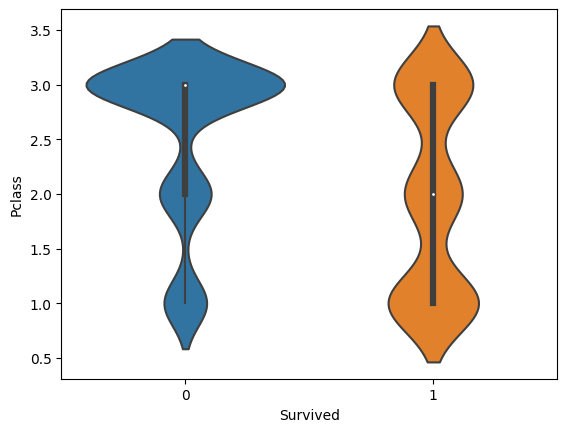

In [129]:
sns.violinplot(x="Survived", y="Pclass", data=data)
#Vi kan se att de som sticker ut är de som var tredje klass
#Jag tror detta beror på att det var fler passagerare som var tredje klass än första och andra
#Dock så kan vi se att det var fler 1:a klass än 3:e klass så detta detta får mig att återigen
#tro på att första de av högra status prioriterades över de mindre rika
#Jag tror detta kan analyseras djupare för en bättre accuracy_score

<Axes: xlabel='Survived', ylabel='Parch'>

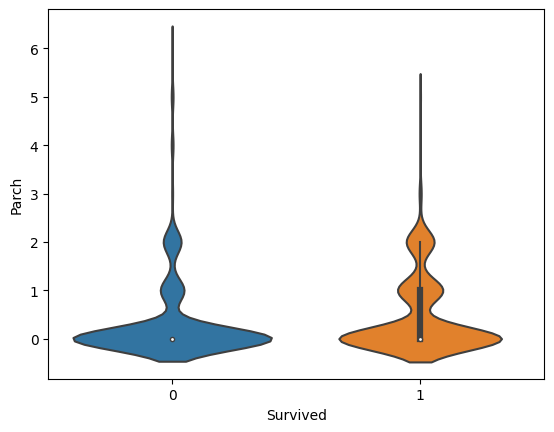

In [130]:
sns.violinplot(x="Survived", y="Parch", data=data)
#Vissar liknande resultat till "SibSp"

In [131]:

def clean (data):# Gör en def eftersom jag behöver "cleana" både "data" och "test"
    data = data.drop(["Ticket", "Cabin", "PassengerId"], axis = 1)
    #Tar bort onödiga data och data som är svår att analysera utan mycket extra jobb
    #PassengerId är helt orelevant men De andra parametrarna kan användas för att vidare optimera accuracy

    #Byt ut de värden som är tomma med "U"
    cols = ["SibSp", "Parch", "Age", "Fare"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [132]:
#Jag kommer nu att ta reda på vilka titlar är de vanligaste för att sedan kunna se 
#ifall ens title påvärkar ens survival rate
from collections import Counter
import re

#Här tar jag ut de mest använda orden i "Names" genom att göra om det till en lista 
all_names = ' '.join(data['Name'].tolist())

#sedan ser jag till att bara jämföra ord och inte bokstäver
names = re.findall(r'\b\w+\b', all_names)

#Sen här tar jag reda på de vanligaste orden med .most_common()
name_counts = Counter(names)
top_names = name_counts.most_common(3)

print(f"{top_names}'Other', 65'")
#Jag kommer att använda "Mr.", "Miss." och "Mrs."

[('Mr', 521), ('Miss', 182), ('Mrs', 129)]'Other', 65'


In [133]:
#Här är alla namn som har "Mr.", "Miss.", "Mrs." eller inget av dem (t.ex. dr. eller Sir.)

titles = data[data["Name"].str.contains("Mr\.|Miss|mrs", case=False)]
mr_title = data[data["Name"].str.contains("Mr\.", case=False)]
mrs_title = data[data["Name"].str.contains("Mrs", case=False)]
other_title = data[data["Name"].str.contains("Mr\.|Miss|mrs", case=False)==False]
miss_title = data[data["Name"].str.contains("Miss", case=False)]

print(other_title["Name"])

7               Palsson, Master. Gosta Leonard
16                        Rice, Master. Eugene
30                    Uruchurtu, Don. Manuel E
50                  Panula, Master. Juha Niilo
59          Goodwin, Master. William Frederick
                        ...                   
831            Richards, Master. George Sibley
848                          Harper, Rev. John
850    Andersson, Master. Sigvard Harald Elias
869            Johnson, Master. Harold Theodor
886                      Montvila, Rev. Juozas
Name: Name, Length: 65, dtype: object


In [134]:
#Byt ut alla med en title till ett nummer
data.loc[mr_title.index, "Name"] = 0
data.loc[mrs_title.index, "Name"] = 1
data.loc[miss_title.index, "Name"] = 2
data.loc[other_title.index, "Name"] = 3

data["Name"] = data["Name"].astype(int)

print(data.Name)

0      0
1      1
2      2
3      1
4      0
      ..
886    3
887    2
888    2
889    0
890    0
Name: Name, Length: 891, dtype: int64


In [135]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,1,3,2,female,26.0,0,0,7.9250,S
3,1,1,1,female,35.0,1,0,53.1000,S
4,0,3,0,male,35.0,0,0,8.0500,S


In [136]:
all_title_survival_rate = data.groupby(['Name'])['Survived'].value_counts(normalize=True)
print(all_title_survival_rate)

mr_survival = all_title_survival_rate[0,1]
mrs_survival = all_title_survival_rate[1,1]
miss_survival = all_title_survival_rate[2,1]
other_survival = all_title_survival_rate[3,1]

print("mr_survival: ",round(mr_survival,4)*100)
print("mrs_survival: ",round(mrs_survival,4)*100)
print("miss_survival: ",round(miss_survival,4)*100)
print("other_survival: ",round(other_survival,4)*100)
# Den med högst Survival rate är "mrs">miss>other>mr
#Detta visar att en gift kvinna har större chans att öerleva än en som inte är gift 
#Vi kan även se att "other" antingen drastisk ökar eller drastikt sänker en persons odds
#beroende på "Sex"

Name  Survived
0     0           0.843327
      1           0.156673
1     1           0.795276
      0           0.204724
2     1           0.697802
      0           0.302198
3     1           0.507692
      0           0.492308
Name: Survived, dtype: float64
mr_survival:  15.67
mrs_survival:  79.53
miss_survival:  69.78
other_survival:  50.77


In [137]:
#Meningen med denna optimering är att jag ska kunna ta reda på ifall "other_title"
#ökar ens survival rate beroende på "Sex"

print(other_title["Sex"])

7      male
16     male
30     male
50     male
59     male
       ... 
831    male
848    male
850    male
869    male
886    male
Name: Sex, Length: 65, dtype: object


In [138]:
counts = other_title["Sex"].value_counts()
total = counts.sum()
male_pro = (counts["male"] / total) * 100
female_pro = (counts["female"] / total) * 100
print("Male percentage:", male_pro)
print("Female percentage:", female_pro)
#Vi kan se mycekt tydligt att de är män som utgör majoriteten inom gruppen "other_title"
#Detta visar att tillhöra "other_title" istllet för "mr_title" drastikt öker ens survival rate
#Då en mans överlevnad ökar från ca 15% till ca 50%

Male percentage: 92.3076923076923
Female percentage: 7.6923076923076925


In [139]:
#Jag använder en LabelEncoder för att byta ut string till siffror inom kolumnerna "Sex" och "Embarked"
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data [col] = le.fit_transform (data [col])
    test [col] = le.transform (test [col])
    print (le.classes_)
data.head()

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,22.0,1,0,7.2500,2
1,1,1,1,0,38.0,1,0,71.2833,0
2,1,3,2,0,26.0,0,0,7.9250,2
3,1,1,1,0,35.0,1,0,53.1000,2
4,0,3,0,1,35.0,0,0,8.0500,2


In [140]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


In [141]:
#En funktion för att enkelt kunna se min accuracy
def accuracy(data):
    y= data ["Survived"]
    X= data.drop ("Survived", axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    global clf
    clf = LogisticRegression (random_state=0, max_iter=1000).fit (X_train, y_train)

    predictions = clf.predict (X_val)
    accuracy_score (y_val, predictions)

    accuracy = accuracy_score (y_val, predictions)
    accuracy_percentage = round(accuracy, 4)

    #joblib.dump(clf, "model.joblib")
    return accuracy_score (y_val, predictions)


In [142]:
accuracy(data)

0.7988826815642458

In [143]:
#Jag testade med och utan "Name" och accuracy_score ökade från 79.89% till -> 81.01%
#när jag tog bort "Name" från min algoritm
#Jag tror att anledningen till att varför accuracy_score minskar när jag lägger till "Name"
#är för att datan är obalanserad och att min metod för att sortera dem inte är tillräkligt bra.
#Jag tror även att det jag borde ta reda på mer om relationen som titlar har till både "Survival"
#och annat som "Age", "Sex" m.m.

In [144]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,22.0,1,0,7.2500,2
1,1,1,1,0,38.0,1,0,71.2833,0
2,1,3,2,0,26.0,0,0,7.9250,2
3,1,1,1,0,35.0,1,0,53.1000,2
4,0,3,0,1,35.0,0,0,8.0500,2


In [145]:
#ta bort en eller flera columner för att test accuracy
def remove_column():
    new_df = data.drop(columns=["Name"])

    return accuracy(new_df)

In [146]:
#Automatiskt testa olika kombinationer av columner
def all_columns():
    for col in data.columns:
        remove_column(col)

    return accuracy(remove_column(col))

In [147]:
def accuracy_diff():
    
    new = remove_column()
    old = accuracy(data)
    
    difference = new/old
    diff_pro = difference
    
    if new > old:
        print(f"Efficency increased by: {round(diff_pro-1,4)}%")
    
    elif new < old:
        print(f"Efficency decreased by: {round(1-diff_pro,4)}%")

    else:
        print(f"No change in efficency")
    return new

In [148]:
accuracy_diff()

Efficency increased by: 0.014%


0.8100558659217877

In [149]:
import pickle
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
    print("Dumped")

Dumped


In [150]:
joblib.dump(clf, "titanic_model.joblib")


['titanic_model.joblib']